In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_csv('/Users/ramonmora/Desktop/TKH/Cybersecurity-Intrusion-Analysis/data/AWS_Honeypot_marx-geo.csv')

In [42]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [43]:
df.columns

Index(['datetime', 'host', 'src', 'proto', 'type', 'spt', 'dpt', 'srcstr',
       'cc', 'country', 'locale', 'localeabbr', 'postalcode', 'latitude',
       'longitude', 'Unnamed: 15'],
      dtype='object')

In [44]:
df.dtypes

datetime        object
host            object
src              int64
proto           object
type           float64
spt            float64
dpt            float64
srcstr          object
cc              object
country         object
locale          object
localeabbr      object
postalcode      object
latitude       float64
longitude      float64
Unnamed: 15    float64
dtype: object

## Data Dictionary

- **date time (object)**: Represents the date and time of the intrusion event in "MM/DD/YY HH:MM" format.
- **host (object)**: The identifier of the host system where the intrusion event occurred.
- **src (int64)**: A unique code representing the source of the data intrusion.
- **proto (object)**: The communication protocol used in the intrusion event, such as TCP or UDP.
- **type (float64)**: Additional information or categorization of the intrusion event.
- **spt (float64)**: The source port number used by the intruder.
- **dpt (float64)**: The destination port number on the host where the intrusion occurred.
- **srcstr (object)**: The source IP address of the intrusion.
- **cc (object)**: The country code representing the country of the source.
- **country (object)**: The name of the country associated with the source address.
- **locale (object)**: A more specific location within the country, such as a city or region.
- **localeabbr (object)**: An abbreviation for the locale.
- **postalcode (object)**: The postal code or ZIP code for the source address.
- **latitude (float64)**: The latitude coordinate for the source address.
- **longitude (float64)**: The longitude coordinate for the source address.

In [45]:
df.info

<bound method DataFrame.info of             datetime               host         src proto  type      spt  \
0       3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
1       3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0   
2       3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0   
3       3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0   
4       3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0   
...              ...                ...         ...   ...   ...      ...   
451576   9/8/13 5:54     groucho-oregon  1922977453   TCP   NaN  62175.0   
451577   9/8/13 5:50         groucho-eu  1017974360   TCP   NaN   6000.0   
451578   9/8/13 5:55     groucho-oregon  3234358955   TCP   NaN   6000.0   
451579   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   
451580   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   

           dpt           srcstr  cc        country     

In [46]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


## Clean dataset

Some missing dataset which we will clean by removing unlabeled columns.

In [47]:
df.drop(['Unnamed: 15'], axis=1, inplace=True)

In [48]:
df.isna().sum()

datetime           0
host               0
src                0
proto              0
type          406770
spt            44811
dpt            44811
srcstr             0
cc              3596
country         3634
locale        109469
localeabbr    119876
postalcode    365103
latitude        3469
longitude       3428
dtype: int64

In [49]:
# number of rows in the dataset
df.size

6773715

In [50]:
#let's try to get our basic stat info from dataframes 
df.describe()

,src,type,spt,dpt,latitude,longitude
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    451581 non-null  object 
 1   host        451581 non-null  object 
 2   src         451581 non-null  int64  
 3   proto       451581 non-null  object 
 4   type        44811 non-null   float64
 5   spt         406770 non-null  float64
 6   dpt         406770 non-null  float64
 7   srcstr      451581 non-null  object 
 8   cc          447985 non-null  object 
 9   country     447947 non-null  object 
 10  locale      342112 non-null  object 
 11  localeabbr  331705 non-null  object 
 12  postalcode  86478 non-null   object 
 13  latitude    448112 non-null  float64
 14  longitude   448153 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 51.7+ MB


In [52]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500


## Top countries



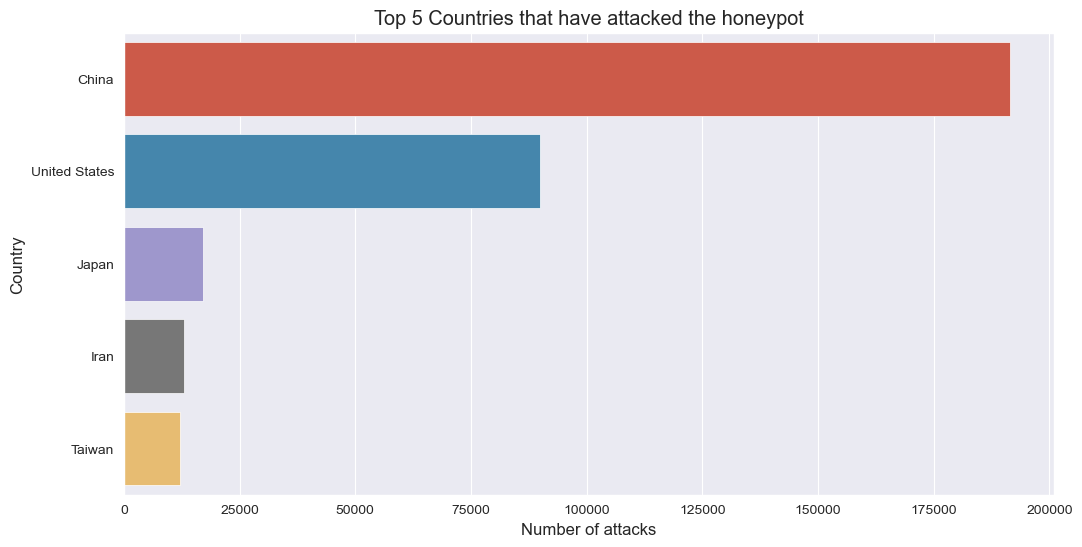

In [53]:
# take the top 10 countries

df.country.value_counts().head(10)

# get the columns of the top 10 countries
top_countries = df.country.value_counts().head(5).index
top_ten_df = df[df.country.isin(top_countries)].country

# plot the top 10 countries sorted from largest to smallest
plt.figure(figsize=(12, 6))
sns.countplot(y=top_ten_df, order=top_ten_df.value_counts().index)

# set title and labels
plt.title('Top 5 Countries that have attacked the honeypot')
plt.xlabel('Number of attacks')
plt.ylabel('Country')

sns.set_style('darkgrid')

/var/folders/l0/7mds44615d94b437tm14dmb40000gn/T/ipykernel_89786/344418679.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day'] = pd.to_datetime(df.datetime).dt.day_name()


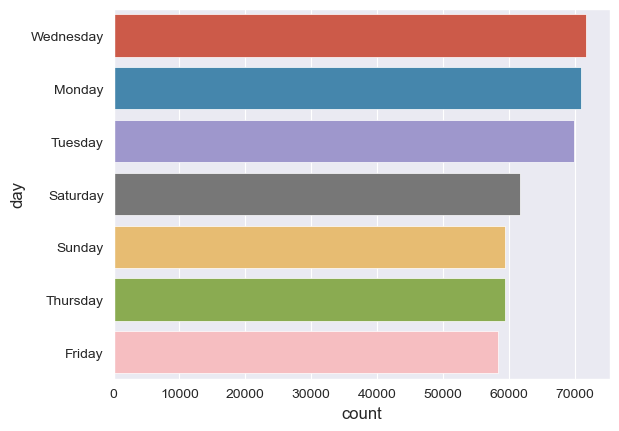

In [54]:
# feature engineer the time column into day of the week

df['day'] = pd.to_datetime(df.datetime).dt.day_name()


# plot the day of the week that the attacks happened overall
sns.countplot(y=df.day, order=df.day.value_counts().index)
sns.set_style('darkgrid')

<Axes: xlabel='locale'>

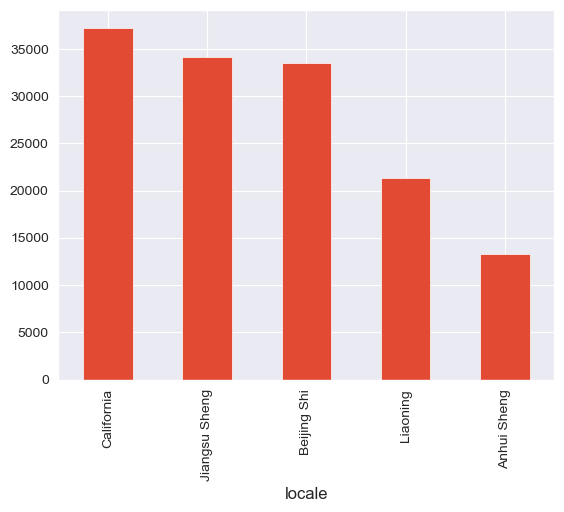

In [55]:
df["locale"].value_counts().head().plot.bar()

In [56]:
df["country"].value_counts()

country
China            191394
United States     89982
Japan             17204
Iran              13042
Taiwan            12148
                  ...  
Andorra               2
Bermuda               1
Barbados              1
Namibia               1
Cape Verde            1
Name: count, Length: 177, dtype: int64

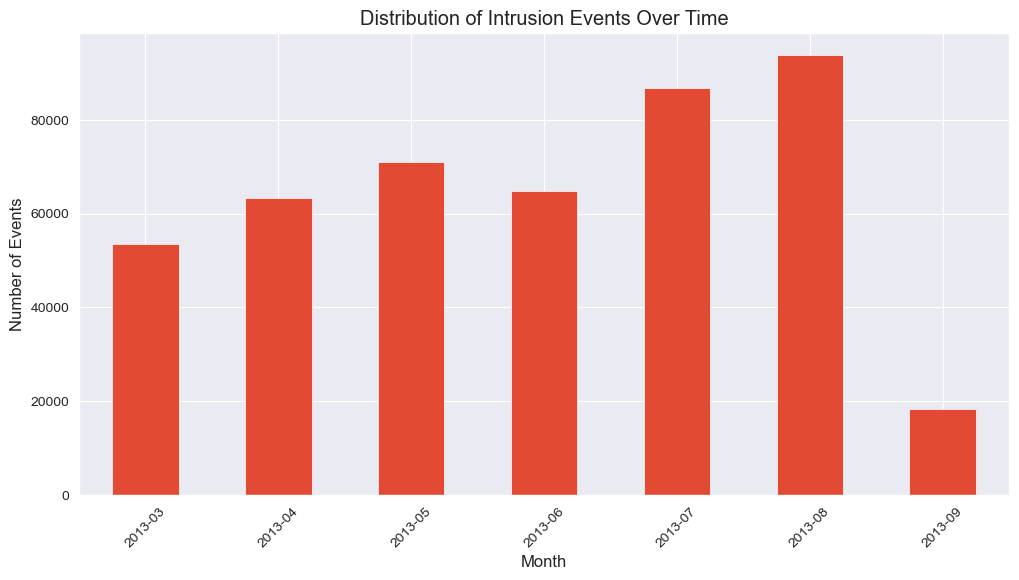

In [57]:
#ensure datetime format is correct
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')
# Plotting the distribution of intrusion events over time
plt.figure(figsize=(12, 6))
df["datetime"].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Intrusion Events Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

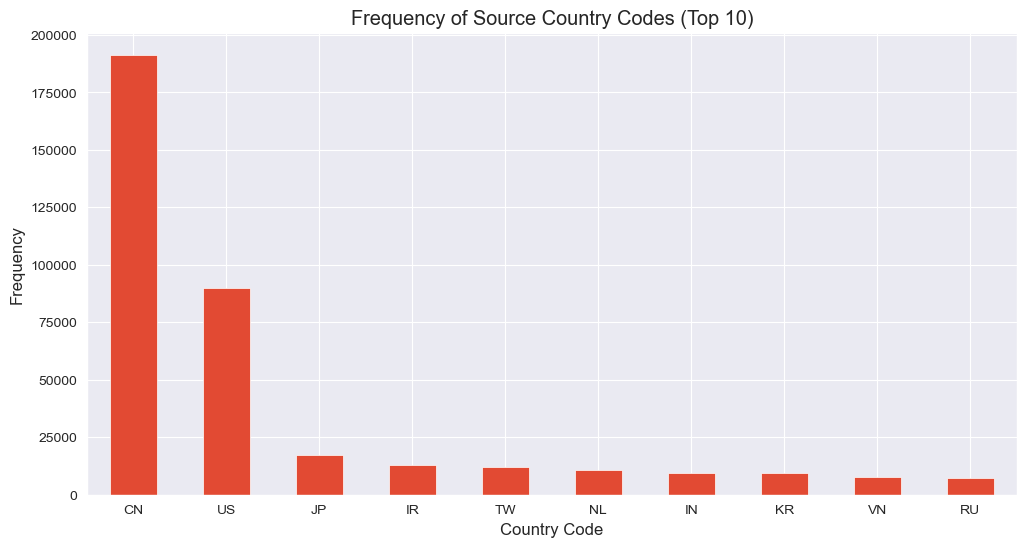

In [58]:
# Plotting the frequency of source country codes (Top N)
top_n = 10  # Adjust this value as needed
top_countries = df['cc'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title(f'Frequency of Source Country Codes (Top {top_n})')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

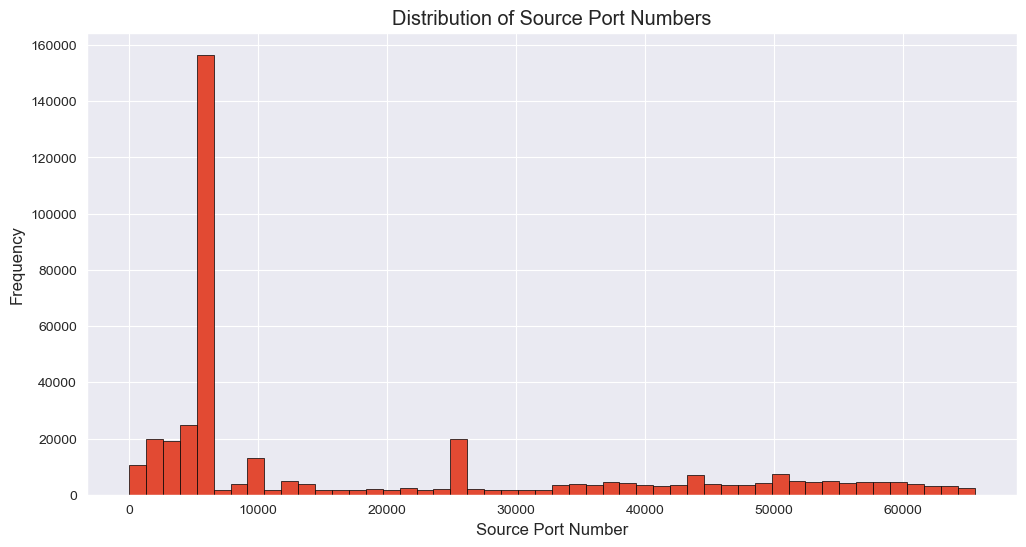

In [59]:
# Plotting the distribution of source port numbers
plt.figure(figsize=(12, 6))
df['spt'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Source Port Numbers')
plt.xlabel('Source Port Number')
plt.ylabel('Frequency')
plt.show()

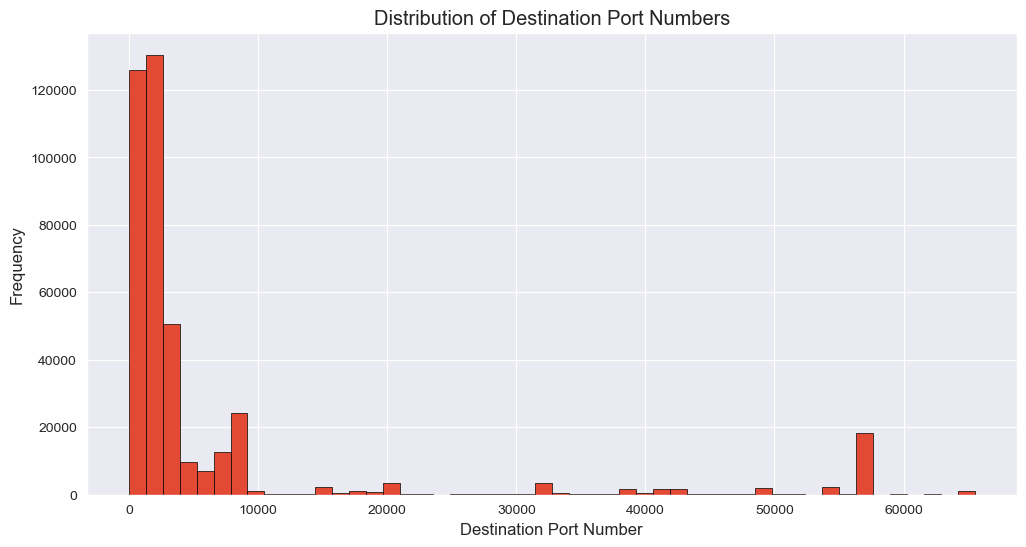

In [60]:
# Plotting the distribution of destination port numbers
plt.figure(figsize=(12, 6))
df['dpt'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Destination Port Numbers')
plt.xlabel('Destination Port Number')
plt.ylabel('Frequency')
plt.show()

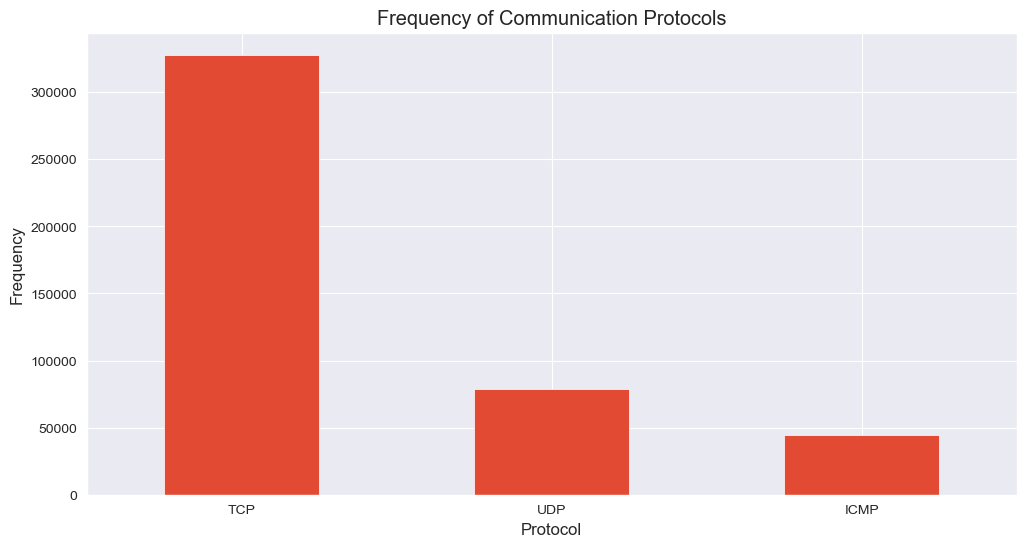

In [61]:
# Plotting the frequency of communication protocols
plt.figure(figsize=(12, 6))
df['proto'].value_counts().plot(kind='bar')
plt.title('Frequency of Communication Protocols')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

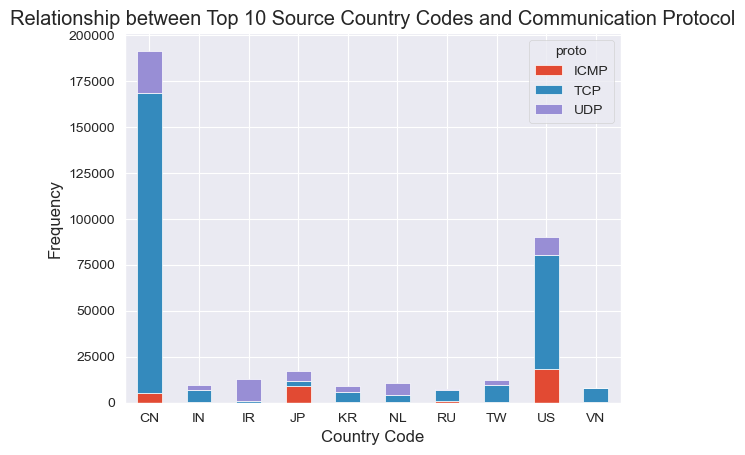

In [62]:
# Get the top 10 countries by frequency
top_countries = df['cc'].value_counts().nlargest(10).index.tolist()

# Filter the dataframe to include only the top 10 countries
df_filtered = df[df['cc'].isin(top_countries)]

# Plotting the relationship between Source Country Code and Communication Protocol for top 10 countries
plt.figure(figsize=(10, 6))
pd.crosstab(df_filtered['cc'], df_filtered['proto']).plot(kind='bar', stacked=True)
plt.title('Relationship between Top 10 Source Country Codes and Communication Protocol')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

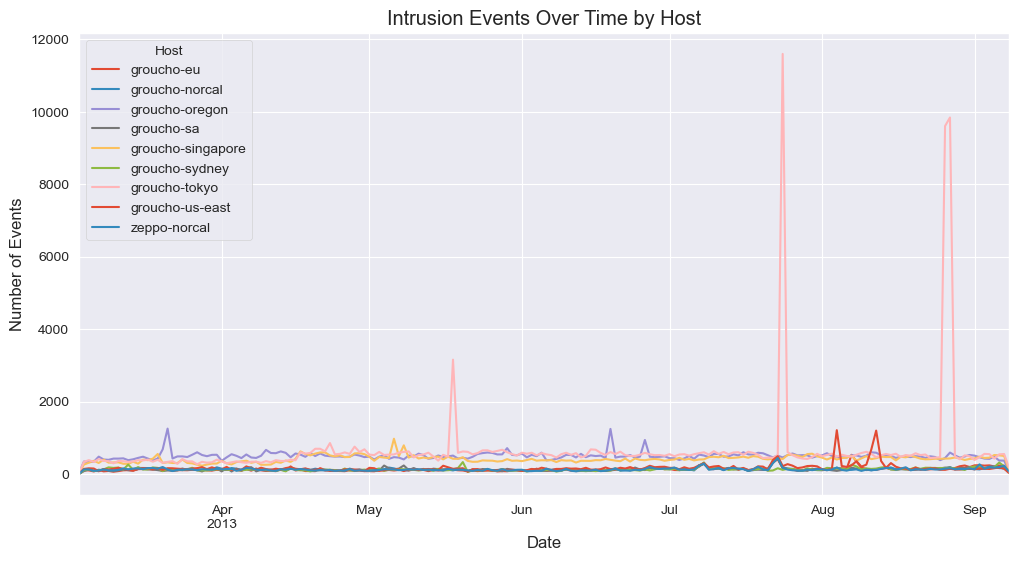

In [63]:
# Plotting the frequency of intrusion events over time for each host
plt.figure(figsize=(12, 6))
for host, group in df.groupby('host'):
    group.set_index('datetime').resample('D').size().plot(label=host)

plt.title('Intrusion Events Over Time by Host')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Host')
plt.show()

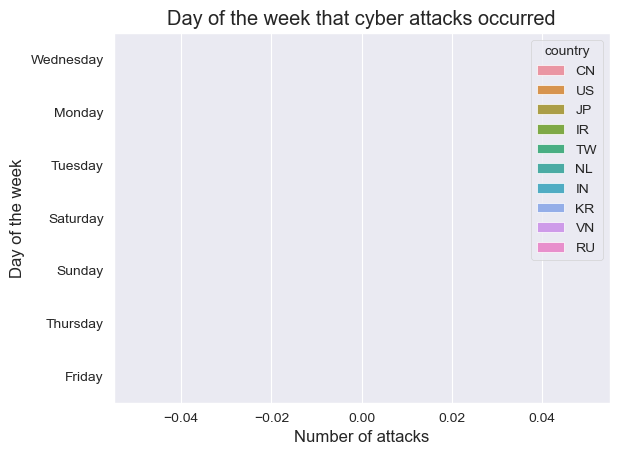

In [64]:
# For specific countries are there days that they are more likely to attack the honeypot?
# plot the day of the week that the attacks happened for the top countries

# only top countries
sns.countplot(y=df.day, order=df.day.value_counts().index, hue=df.country, hue_order=top_countries)

# set title and labels
plt.title('Day of the week that cyber attacks occurred')
plt.xlabel('Number of attacks')
plt.ylabel('Day of the week')

plt.style.use('ggplot')
sns.set_style('darkgrid') 

China attacks more on monday and tuesday. Iran attacks more on Wednesday some on monday and tuesday and almost never on other days. The United States attacks consistently on all days same with taiwan.

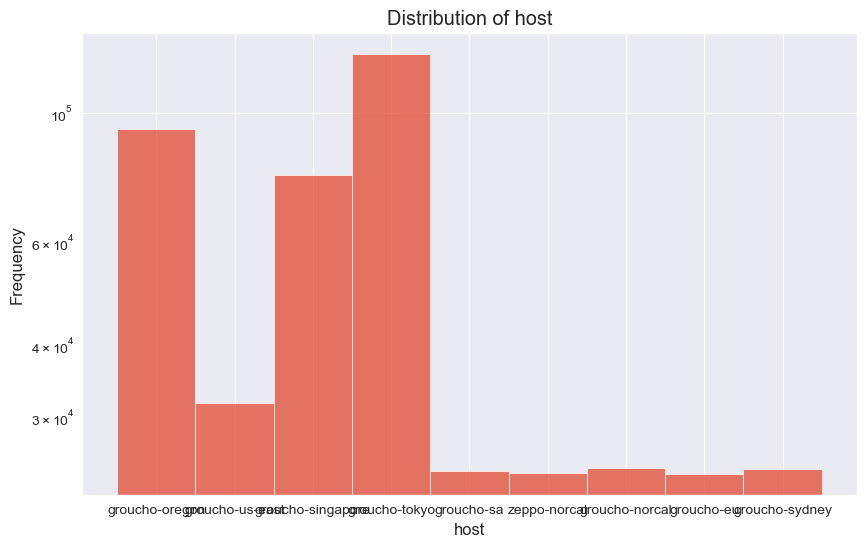

In [65]:
# Creating histogram to determine distribution of host interceptions, goucha-tokyo has the highest amount of host interceptions. 
plt.figure(figsize=(10, 6))
sns.histplot(df['host'], bins=50, kde=False)
plt.title('Distribution of host')
plt.xlabel('host')
plt.yscale("log")
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Histogram representation of countries that are intercepting')

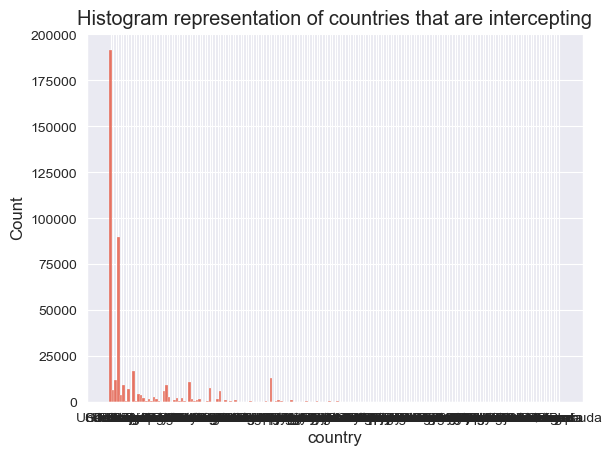

In [66]:
#let's visualize where they are intercepting from
sns.histplot(data = df, x = "country")
plt.title('Histogram representation of countries that are intercepting')

In [67]:
# View createst amount of interceptions per country, China is the highest and the U.S. is second. 
df.value_counts(['country'])

country      
China            191394
United States     89982
Japan             17204
Iran              13042
Taiwan            12148
                  ...  
Burundi               2
Cape Verde            1
Bermuda               1
Barbados              1
Namibia               1
Name: count, Length: 177, dtype: int64

# What times are the attacks happening

In [68]:
#let's sort our variables based on country and host status 
#first we need to create new section just with our variables 

country_host_h = df.groupby(['country', 'host']).size()
print("Country and their host status:", country_host_h)
print("   ")

Country and their host status: country      host             
Afghanistan  groucho-oregon       2
             groucho-sydney       1
             groucho-tokyo        2
             zeppo-norcal         2
Albania      groucho-eu           7
                                 ..
Zimbabwe     groucho-singapore    2
             groucho-sydney       1
             groucho-tokyo        3
             groucho-us-east      1
             zeppo-norcal         1
Length: 1133, dtype: int64
   


<Axes: xlabel='count', ylabel='time_of_day'>

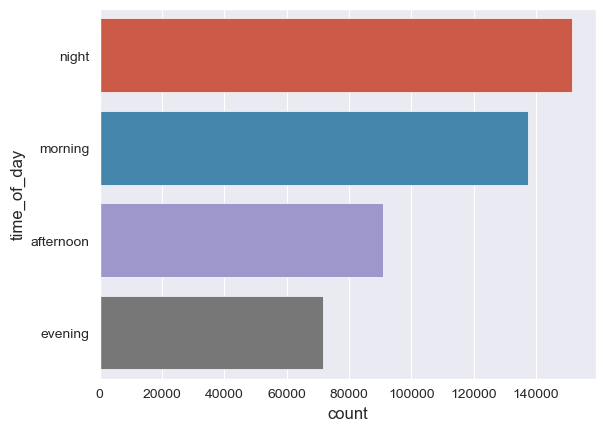

In [69]:
# sort attacks by morning, afternoon, evening and night

df['hour'] = pd.to_datetime(df.datetime).dt.hour

# function to sort the hours into morning, afternoon, evening and night

def sort_hours(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 21:
        return 'evening'
    else:
        return 'night'
    
df['time_of_day'] = df.hour.apply(sort_hours)

# plot the time of day that the attacks happen

sns.countplot(y=df.time_of_day, order=df.time_of_day.value_counts().index)

Text(0.5, 1.0, 'Time of day that attacks happened for the top countries')

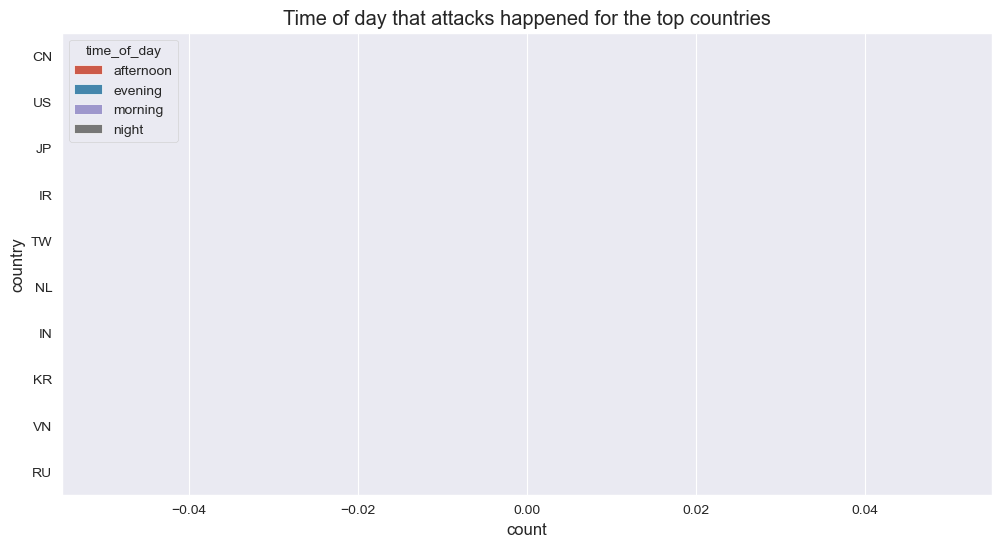

In [70]:
# group the attacks by country and time of day

grouped = df.groupby(['country', 'time_of_day']).size().reset_index(name='count')

# plot the grouped data

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', hue='time_of_day', data=grouped, order=top_countries)

# set title and labels
plt.title('Time of day that attacks happened for the top countries')

## Analysis of when the top 5 countries do their cyber attacks

The time of day that countries primarily do cyber attacks are at night. With the exception of Iran which does it's cyber attacks in the morning. The majority of cyber attacks happen in the morning or night. With the evening being the least amount of cyber attacks.

# Which months are the cyber attacks happening?

<Axes: xlabel='count', ylabel='month'>

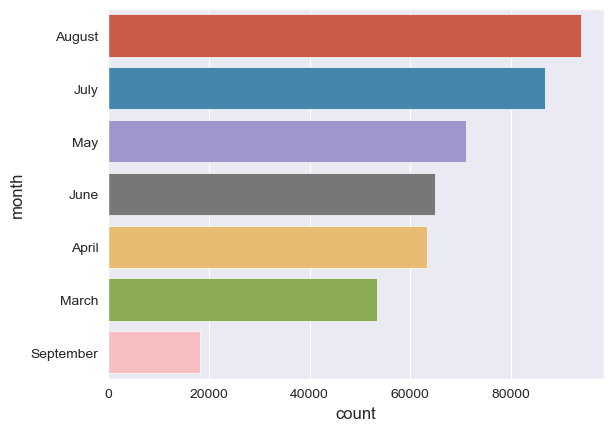

In [71]:
# display most attacks on what month

df['month'] = pd.to_datetime(df.datetime).dt.month

# label the month

df['month'] = df['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# plot the month that the attacks happened overall

sns.countplot(y=df.month, order=df.month.value_counts().index)

Text(0.5, 1.0, 'Month that attacks happened for the top countries')

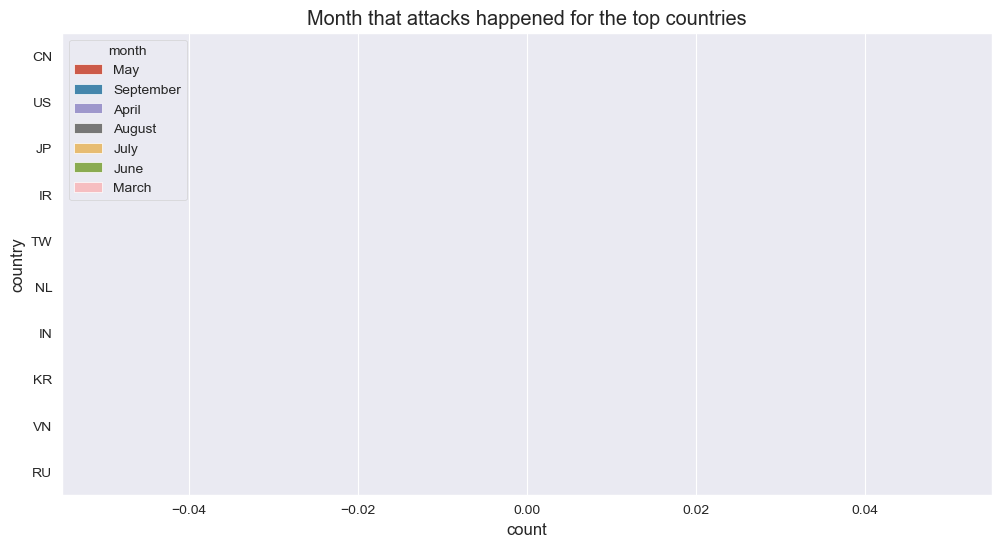

In [72]:
# group by month and country

df['month'] = pd.to_datetime(df.datetime).dt.month_name()

grouped = df.groupby(['country', 'month']).size().reset_index(name='count')

# plot the grouped data

plt.figure(figsize=(12, 6))

sns.barplot(x='count', y='country', hue='month', data=grouped, order=top_countries)

# set title and labels
plt.title('Month that attacks happened for the top countries')


Text(0.5, 1.0, 'Percentage of attacks per top 5 country')

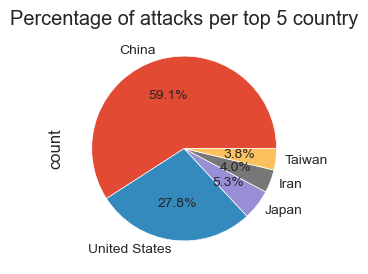

In [73]:
# pie chart of percentage of attacks per top 5 country

plt.figure(figsize=(8, 3))
df.country.value_counts().head(5).plot.pie(autopct='%1.1f%%')

# set title

plt.title('Percentage of attacks per top 5 country')

## Cyber Attacks by Percentage

This pie chart represents the percentage of attacks coming from each country. China dominates the cyber attacks by having nearly 60% of all cyber attacks coming second is the United States with ~28%. 